In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, uuid
from pathlib import Path

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
dataset = pd.read_parquet("../data/processed/dataset.parquet")

In [4]:
dataset.shape

(419650, 55)

In [5]:
# on remplace les identifiants nuls par un identifiant aléatoire
#n'est plus necessaire car on a supprimé les données de 2020
# dataset["identifiant_usager"] = dataset["identifiant_usager"].apply(lambda row: row if row is not None else int(str(hash(uuid.uuid4()))[:9]))

In [6]:
# on enlève les doublons (environ 39k)
dataset = dataset.drop_duplicates(subset=["identifiant_usager"])

In [7]:
dataset.describe()

,jour_accident,mois_accident,annee_accident,conditions_lumieres,localisation,type_intersection,conditions_atmospheriques,type_collision,categorie_route,indice_route,regime_circulation,presence_voie_reservee,profil_route,tracage_route,etat_surface,infrastructure,situation_accident,vitesse_max_autorisee,sens_circulation,categorie_vehicule,obstacle_fixe_heurte,obstacle_mobile_heurte,point_choc_initial,manoeuvre_avant_accident,type_motorisation,nombre_occupants_tc,place_occupant,categorie_usager,gravite_blessure,sexe_usager,annee_naissance,motif_deplacement,equipement_securite_1,equipement_securite_2,equipement_securite_3,localisation_pieton,etat_pieton
count,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,381700.000000,5127.000000,381699.000000,381699.000000,381699.000000,381699.000000,373160.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000
mean,15.596919,6.749568,2021.990935,1.898001,1.614139,2.069337,1.607689,3.753364,3.303498,-0.180642,1.805292,0.211048,1.225562,1.284627,1.249361,0.775627,1.519303,59.932864,1.573529,12.845517,1.119830,1.584915,2.853686,6.930466,1.248342,7.376048,2.072882,1.327860,2.515665,1.267082,1983.594506,3.155431,1.866900,0.902580,-0.906479,-0.220849,-0.826719
std,8.751642,3.330800,0.817363,1.469402,0.486799,1.997372,1.677791,1.863431,1.297677,0.400222,0.923852,0.684359,0.537202,0.664122,0.780300,2.131787,1.486743,26.404889,0.821604,13.720742,3.242209,1.225128,2.391660,7.970500,1.012867,12.209951,2.565231,0.608479,1.380409,0.570289,18.950533,2.775018,2.298974,2.991368,0.924527,1.228152,0.623042
min,1.000000,1.000000,2021.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,1912.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.000000,4.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,1.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1970.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,16.000000,7.000000,2022.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,1.000000,7.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1987.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,23.000000,10.000000,2023.000000,3.000000,2.000000,2.000000,1.000000,6.000000,4.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000,2.000000,10.000000,0.000000,2.000000,4.000000,15.000000,1.000000,7.000000,2.000000,2.000000,4.000000,2.000000,1999.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000
max,31.000000,12.000000,2023.000000,5.000000,2.000000,9.000000,9.000000,7.000000,9.000000,3.000000,4.000000,3.000000,4.000000,4.000000,9.000000,9.000000,8.000000,901.000000,3.000000,99.000000,17.000000,9.000000,9.000000,26.000000,6.000000,65.000000,10.000000,3.000000,4.000000,2.000000,2023.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [8]:
# valeurs manquantes
dataset.isna().mean()*100

numero_accident               0.000000
jour_accident                 0.000000
mois_accident                 0.000000
annee_accident                0.000000
heure_accident                0.000000
conditions_lumieres           0.000000
departement                   0.000000
commune                       0.000000
localisation                  0.000000
type_intersection             0.000000
conditions_atmospheriques     0.000000
type_collision                0.000000
adresse                       1.983757
latitude                      0.000000
longitude                     0.000000
categorie_route               0.000000
numero_route                  8.859314
indice_route                  0.000000
lettre_route                 90.580037
regime_circulation            0.000000
nombre_voies                  0.000000
presence_voie_reservee        0.000000
profil_route                  0.000000
numero_pr                     0.000000
distance_pr                   0.000000
tracage_route            

In [9]:
#on supprime les colonnes qui ne nous apportent pas d'information
cols_to_drop = ['lettre_route', 'adresse', 'latitude', 'longitude', 'numero_route', 'indice_route', 'lettre_route', 'lartpc','nombre_occupants_tc' ]
dataset = dataset.drop(cols_to_drop, axis=1)

In [10]:
#on supprime les lignes qui ont 'place_occupant' manquant car 6 autres variables sont aussi manquantes dans ces cas et on a que 2k valeurs donc on les oublie
dataset = dataset.dropna(subset=["place_occupant"])

In [11]:
#on remplace les valeurs nulles par -1 car la valeur manquante represente une information 
# (ex: delit de fuite) on choisit -1 pour etre dans les codes du dataset
dataset['annee_naissance'] = dataset['annee_naissance'].fillna(-1)

In [12]:
#les transports en commun ne seont present que dans 1% des accidents, mais ils donnent potentiellement un info sur la gravité de l'accident
#on décide de drop cette variable plutot que de la completer de 0 (pas de victime de transport en commun)
# dataset[dataset['nombre_occupants_tc'].notnull()]['nombre_occupants_tc'].value_counts()

In [13]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(dataset == -1, cbar=False, cmap="viridis")
# plt.title("Visualisation des données avec -1 pour representer une donnée inconnue")
# plt.show()

In [14]:
(dataset == -1).sum()

numero_accident                   0
jour_accident                     0
mois_accident                     0
annee_accident                    0
heure_accident                    0
conditions_lumieres               7
departement                       0
commune                           0
localisation                      0
type_intersection                28
conditions_atmospheriques        24
type_collision                  194
categorie_route                   0
regime_circulation            22683
nombre_voies                      0
presence_voie_reservee         3570
profil_route                    160
numero_pr                         0
distance_pr                       0
tracage_route                   121
larrout                           0
etat_surface                    149
infrastructure                 3786
situation_accident              150
vitesse_max_autorisee          8186
identifiant_vehicule              0
numero_vehicule                   0
sens_circulation            

In [15]:
dataset.isna().mean()*100

numero_accident              0.0
jour_accident                0.0
mois_accident                0.0
annee_accident               0.0
heure_accident               0.0
conditions_lumieres          0.0
departement                  0.0
commune                      0.0
localisation                 0.0
type_intersection            0.0
conditions_atmospheriques    0.0
type_collision               0.0
categorie_route              0.0
regime_circulation           0.0
nombre_voies                 0.0
presence_voie_reservee       0.0
profil_route                 0.0
numero_pr                    0.0
distance_pr                  0.0
tracage_route                0.0
larrout                      0.0
etat_surface                 0.0
infrastructure               0.0
situation_accident           0.0
vitesse_max_autorisee        0.0
identifiant_vehicule         0.0
numero_vehicule              0.0
sens_circulation             0.0
categorie_vehicule           0.0
obstacle_fixe_heurte         0.0
obstacle_m

37 908 doublons sur 526 844 lignes
tous concentrés sur l'année 2023

potentielles features par rapport a un accident (groupby id accident) => nb des gens dans l'accident et nb de victimes

In [16]:
#incoherences
display(dataset.describe())

,jour_accident,mois_accident,annee_accident,conditions_lumieres,localisation,type_intersection,conditions_atmospheriques,type_collision,categorie_route,regime_circulation,presence_voie_reservee,profil_route,tracage_route,etat_surface,infrastructure,situation_accident,vitesse_max_autorisee,sens_circulation,categorie_vehicule,obstacle_fixe_heurte,obstacle_mobile_heurte,point_choc_initial,manoeuvre_avant_accident,type_motorisation,place_occupant,categorie_usager,gravite_blessure,sexe_usager,annee_naissance,motif_deplacement,equipement_securite_1,equipement_securite_2,equipement_securite_3,localisation_pieton,etat_pieton
count,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000,381699.000000
mean,15.596955,6.749557,2021.990938,1.898003,1.614138,2.069340,1.607691,3.753358,3.303496,1.805294,0.211048,1.225563,1.284627,1.249361,0.775629,1.519297,59.932942,1.573533,12.845554,1.119830,1.584919,2.853681,6.930422,1.248348,2.072882,1.327860,2.515665,1.267082,1939.197082,3.155431,1.866900,0.902580,-0.906479,-0.220849,-0.826719
std,8.751626,3.330798,0.817363,1.469403,0.486799,1.997374,1.677793,1.863430,1.297679,0.923853,0.684360,0.537202,0.664123,0.780301,2.131789,1.486739,26.404879,0.821601,13.720742,3.242213,1.225127,2.391661,7.970462,1.012862,2.565231,0.608479,1.380409,0.570289,294.093638,2.775018,2.298974,2.991368,0.924527,1.228152,0.623042
min,1.000000,1.000000,2021.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.000000,4.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,1.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1969.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,16.000000,7.000000,2022.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,1.000000,7.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1986.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,23.000000,10.000000,2023.000000,3.000000,2.000000,2.000000,1.000000,6.000000,4.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000,2.000000,10.000000,0.000000,2.000000,4.000000,15.000000,1.000000,2.000000,2.000000,4.000000,2.000000,1999.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000
max,31.000000,12.000000,2023.000000,5.000000,2.000000,9.000000,9.000000,7.000000,9.000000,4.000000,3.000000,4.000000,4.000000,9.000000,9.000000,8.000000,901.000000,3.000000,99.000000,17.000000,9.000000,9.000000,26.000000,6.000000,10.000000,3.000000,4.000000,2.000000,2023.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [17]:
#drop the rows that have #VALEURMULTI or #ERREUR in nombre_voies
dataset['nombre_voies'] = dataset['nombre_voies'].str.replace(' ', '')
dataset = dataset[dataset['nombre_voies'] != '#ERREUR']
dataset = dataset[dataset['nombre_voies'] != '#VALEURMULTI']
dataset['nombre_voies'] = dataset['nombre_voies'].astype(int)

In [18]:
#on ne garde que les valeurs de vitesse max autorisée qui sont des multiples de 5 et inférieures à 130 
# (il y avait des valeurs trop petites et trop grandes)
dataset = dataset[(dataset['vitesse_max_autorisee'] % 5 == 0) & (dataset['vitesse_max_autorisee'] <= 130)]

(array([6.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00, 2.5000e+01,
        4.9000e+01, 1.4500e+02, 2.7400e+02, 5.7900e+02, 1.5000e+03,
        1.4330e+03, 1.7550e+03, 1.9350e+03, 3.4970e+03, 2.6320e+03,
        3.7120e+03, 3.8320e+03, 4.0520e+03, 6.4720e+03, 4.6750e+03,
        5.3450e+03, 6.2500e+03, 1.1163e+04, 8.6110e+03, 8.9470e+03,
        9.3100e+03, 1.0069e+04, 1.5531e+04, 9.8300e+03, 1.0137e+04,
        1.1045e+04, 1.7124e+04, 1.2207e+04, 1.2930e+04, 1.3582e+04,
        1.4513e+04, 2.2566e+04, 1.6427e+04, 1.8184e+04, 2.1282e+04,
        3.1422e+04, 1.3699e+04, 8.1470e+03, 4.5770e+03, 3.3370e+03,
        3.8850e+03, 2.3680e+03, 2.3050e+03, 1.9810e+03, 1.4670e+03]),
 array([1912.  , 1914.22, 1916.44, 1918.66, 1920.88, 1923.1 , 1925.32,
        1927.54, 1929.76, 1931.98, 1934.2 , 1936.42, 1938.64, 1940.86,
        1943.08, 1945.3 , 1947.52, 1949.74, 1951.96, 1954.18, 1956.4 ,
        1958.62, 1960.84, 1963.06, 1965.28, 1967.5 , 1969.72, 1971.94,
        1974.16, 1976.38, 1978.6 ,

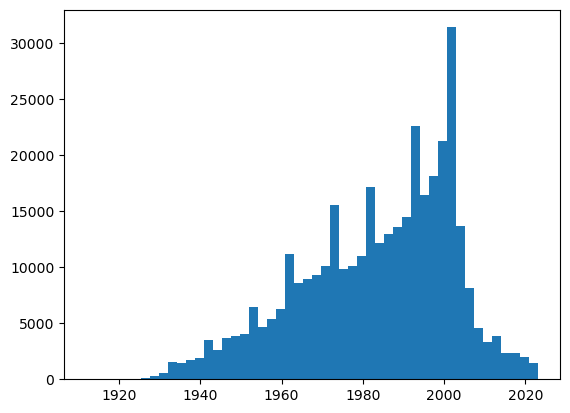

In [19]:
plt.hist(dataset[dataset['annee_naissance'] > 0.0]['annee_naissance'], bins=50)

In [20]:
dataset['numero_pr'] = dataset['numero_pr'].str.replace("(","")
dataset['numero_pr'] = dataset['numero_pr'].str.replace(")","")
dataset['numero_pr'] = dataset['numero_pr'].str.replace(" ","")
dataset['numero_pr'] = dataset['numero_pr'].astype(int)

In [21]:
dataset['distance_pr'] = dataset['distance_pr'].str.replace("(","")
dataset['distance_pr'] = dataset['distance_pr'].str.replace(")","")
dataset['distance_pr'] = dataset['distance_pr'].str.replace(" ","")
dataset['distance_pr'] = dataset['distance_pr'].astype(int)

In [22]:
dataset['larrout'] = dataset['larrout'].str.replace(",",".")
dataset['larrout'] = dataset['larrout'].str.replace(" ","")
dataset['larrout'] = dataset['larrout'].astype(float).astype(int)

In [23]:
dataset['action_pieton'] = dataset['action_pieton'].str.replace(" ","")
dataset['action_pieton'] = dataset['action_pieton'].str.replace("A","10")
dataset['action_pieton'] = dataset['action_pieton'].str.replace("B","11")
dataset['action_pieton'] = dataset['action_pieton'].astype(int)

In [31]:
float_cols = ['place_occupant','categorie_usager','gravite_blessure','sexe_usager','annee_naissance','motif_deplacement',
              'equipement_securite_1','equipement_securite_2','equipement_securite_3','localisation_pieton', 'etat_pieton']
dataset[float_cols] = dataset[float_cols].astype(int)

dataset = dataset.replace(-1, None)

In [32]:
dataset.to_parquet("../data/cleaned/dataset_clean.parquet", index=False)